# DSP QUIZ 

Generate 60 points using the “make moons” dataset.

Build two different SVM classifiers on this data and compare their relative performance.

Using comments in your code explain what each of your two SVM classifiers are doing, and explain how you chose to compare their relative performance (comparison on the training set alone is fine, but you are free to compare them on test sets if you so choose to). *** ONLY KEEP CODE THAT IS NEEDED



In [82]:
# Importing Libraries
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

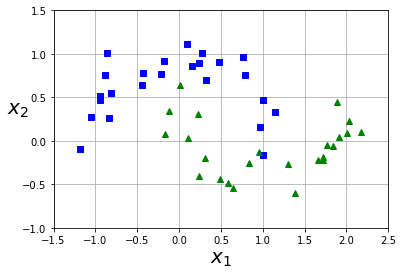

In [83]:
#Data Split and Data Plotting
X, y = make_moons(n_samples=60, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.show()

In [84]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=3))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=3, coef0=1, kernel='poly'))])

- Created a support vector classifier by passing kernel as the poly kernel in SVC() function which is nothing but creating polynomial features by also passing the degree.
- C, Regularization hyperparameter is given as 3. 
- coef0 is given 1.

In [85]:
poly1_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=10, C=3000))
    ])
poly1_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=3000, coef0=10, degree=10, kernel='poly'))])

- Similiarly, Created another support vector classifier by passing kernel as the poly kernel in SVC() function by also increasing the degree to 10.
- C, Regularization hyperparameter is given as 3000. 

In [86]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

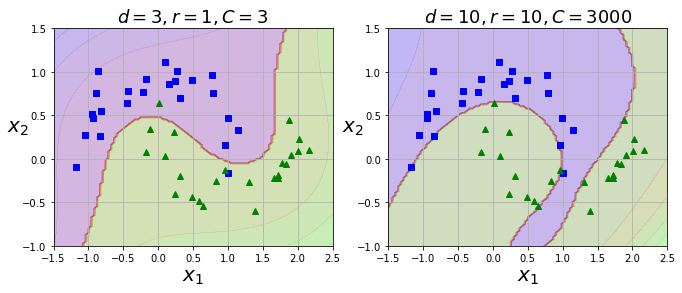

In [87]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=3$", fontsize=18)

plt.subplot(122)
plot_predictions(poly1_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=10, C=3000$", fontsize=18)
plt.show()

**From the above two graphs, we can see that the SVM model with higher C value performs better than the model with C value as 3.**
- Lower C value results in broader margins but will have more margin violations as seen few data points spill over the boundaries.
- Higher C results in narrow margins and will have fewer margin violations.